## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [ ]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score
)

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('./drive/MyDrive/Data Science PGD University of Texas/6. Model Tuning/Project. ReneWind/Train.csv.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


## Data Overview

- Observations
- Sanity checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

* There are a total of 40 features and 1 Target.
* Two columns - V1 and V2 have missing values.
* Target does not have ay missings.

## Statistical Summary of the DataSet

In [ ]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
V1,19982.000,-0.272,3.442,-11.876,-2.737,-0.748,1.840,15.493
V2,19982.000,0.440,3.151,-12.320,-1.641,0.472,2.544,13.089
V3,20000.000,2.485,3.389,-10.708,0.207,2.256,4.566,17.091
V4,20000.000,-0.083,3.432,-15.082,-2.348,-0.135,2.131,13.236
V5,20000.000,-0.054,2.105,-8.603,-1.536,-0.102,1.340,8.134
V6,20000.000,-0.995,2.041,-10.227,-2.347,-1.001,0.380,6.976
V7,20000.000,-0.879,1.762,-7.950,-2.031,-0.917,0.224,8.006
V8,20000.000,-0.548,3.296,-15.658,-2.643,-0.389,1.723,11.679
V9,20000.000,-0.017,2.161,-8.596,-1.495,-0.068,1.409,8.138
V10,20000.000,-0.013,2.193,-9.854,-1.411,0.101,1.477,8.108


* All features have values in the range between -20 and 24
* And Binary Target variable 0 or 1 with overall event rate 5.6%

In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

0

In [ ]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

V1       0.090
V2       0.090
V3       0.000
V4       0.000
V5       0.000
V6       0.000
V7       0.000
V8       0.000
V9       0.000
V10      0.000
V11      0.000
V12      0.000
V13      0.000
V14      0.000
V15      0.000
V16      0.000
V17      0.000
V18      0.000
V19      0.000
V20      0.000
V21      0.000
V22      0.000
V23      0.000
V24      0.000
V25      0.000
V26      0.000
V27      0.000
V28      0.000
V29      0.000
V30      0.000
V31      0.000
V32      0.000
V33      0.000
V34      0.000
V35      0.000
V36      0.000
V37      0.000
V38      0.000
V39      0.000
V40      0.000
Target   0.000
dtype: float64

* V1 and V2 have 9% missing data. Other features have no missings.
* we have no duplicated rows

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

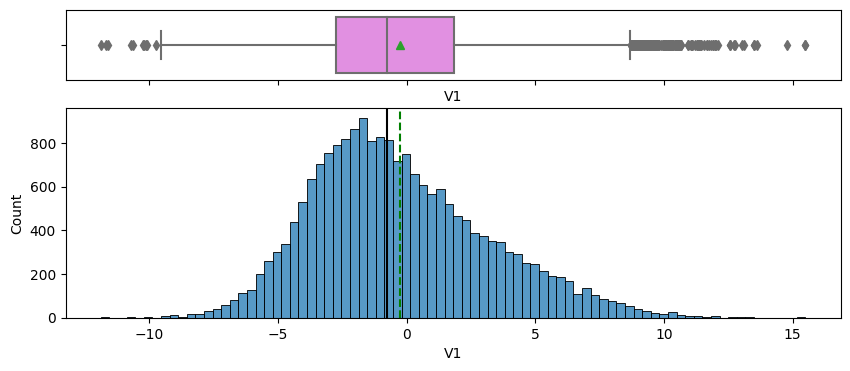

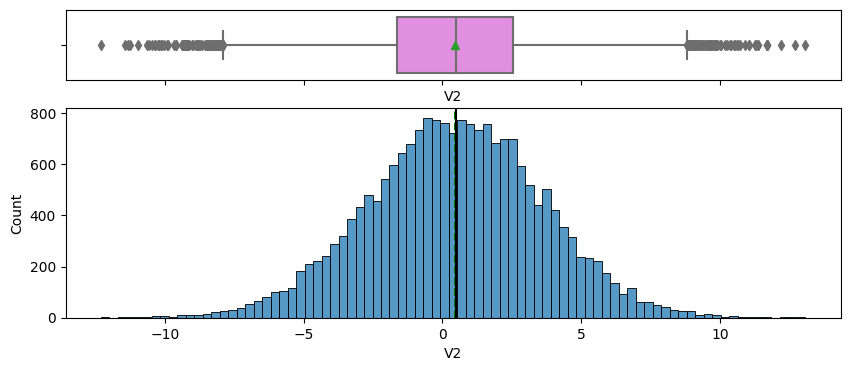

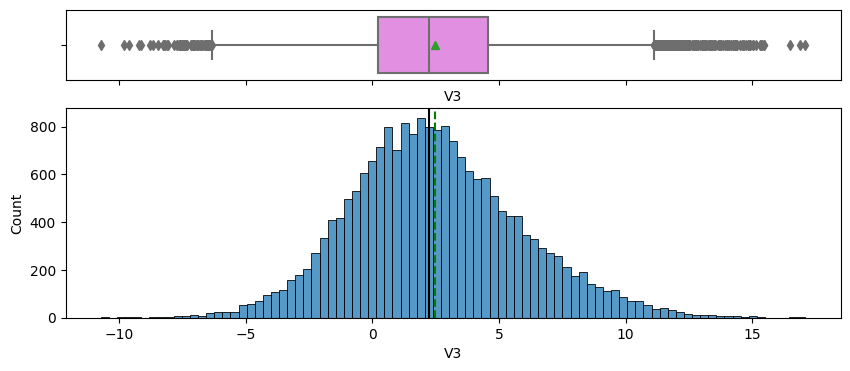

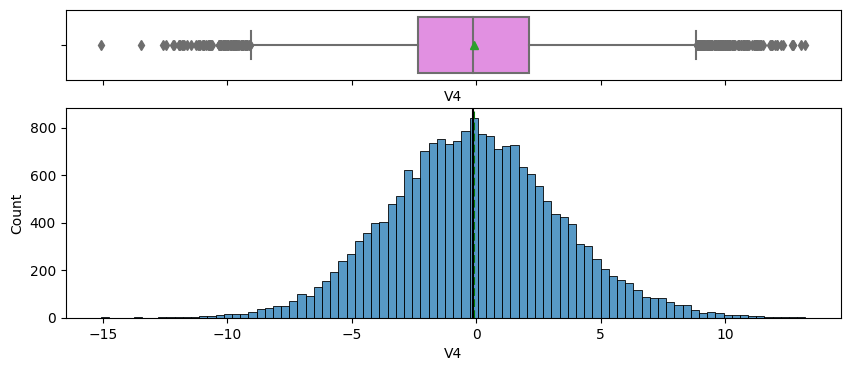

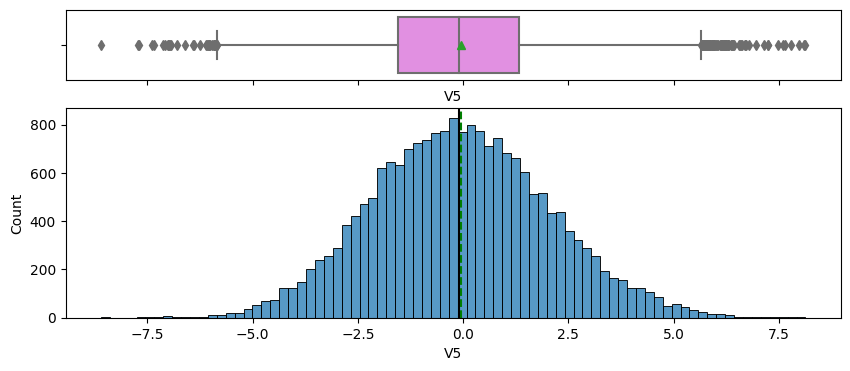

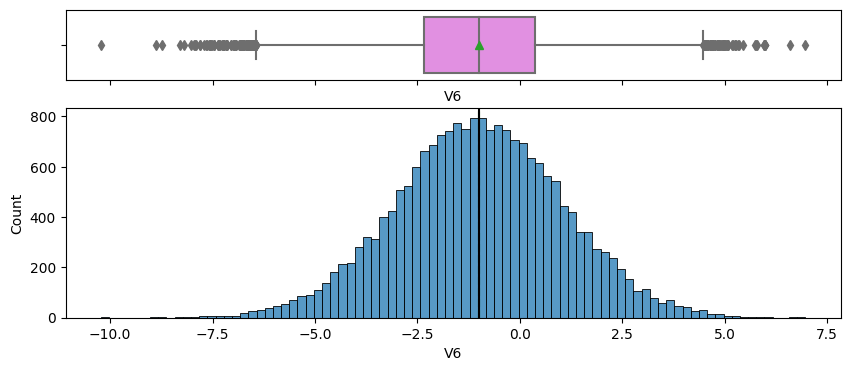

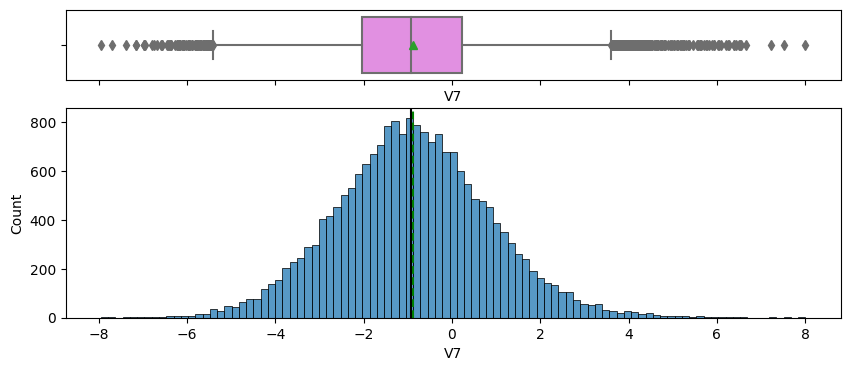

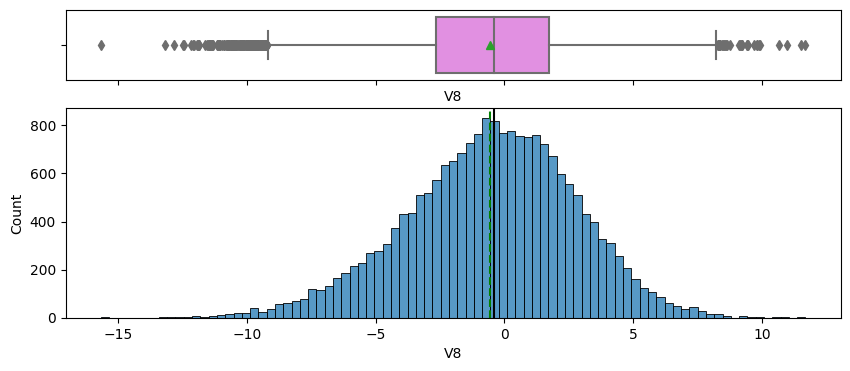

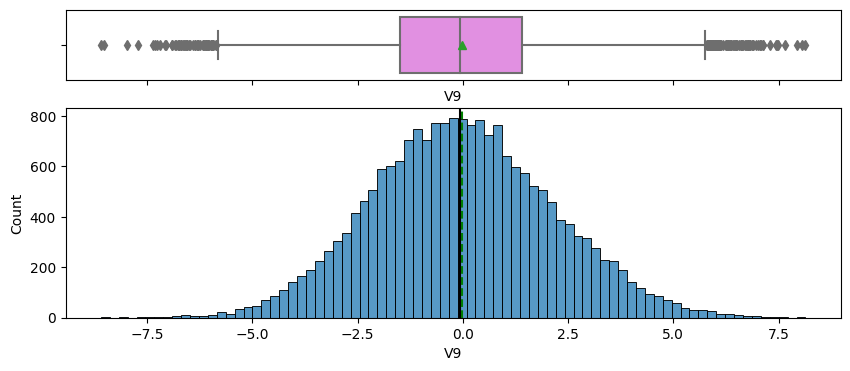

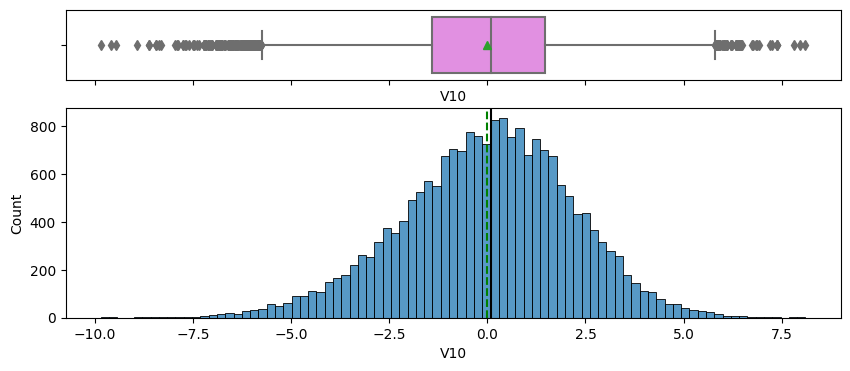

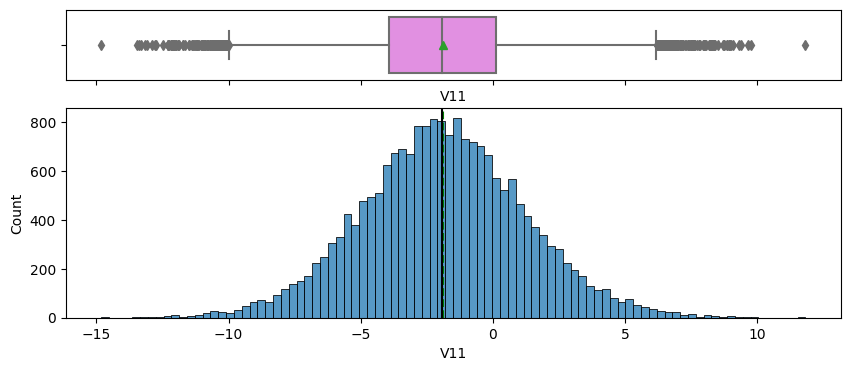

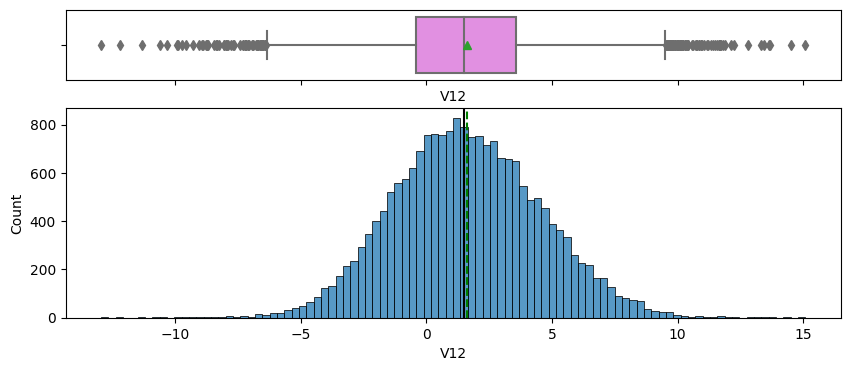

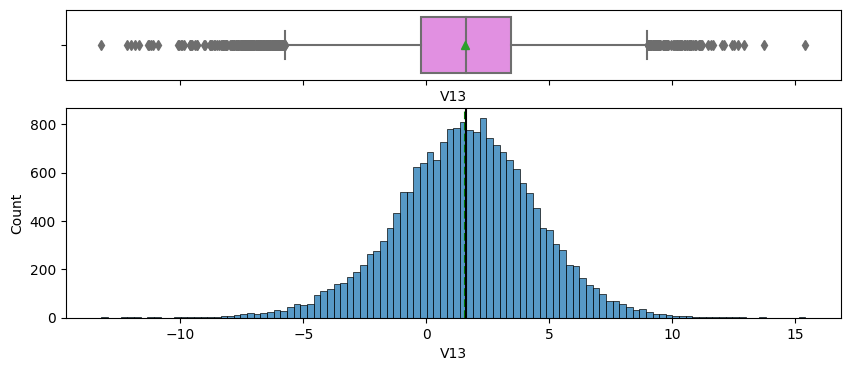

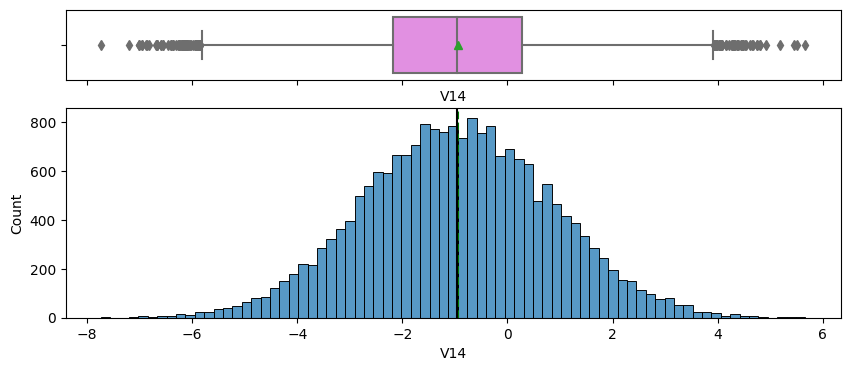

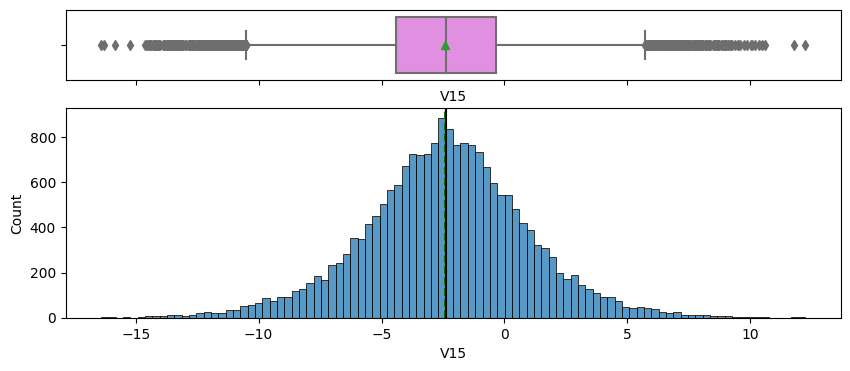

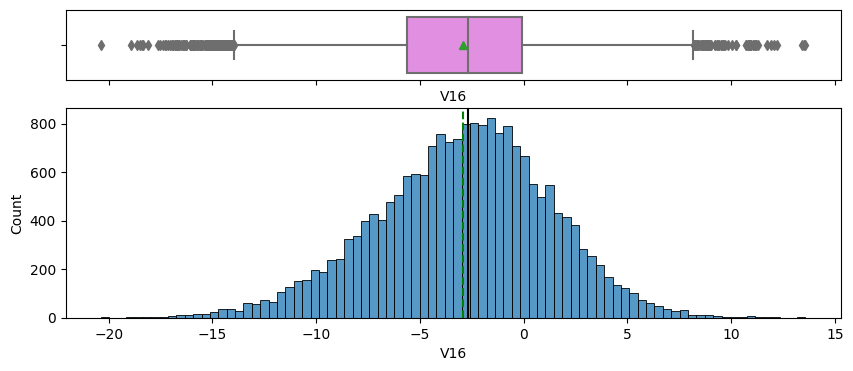

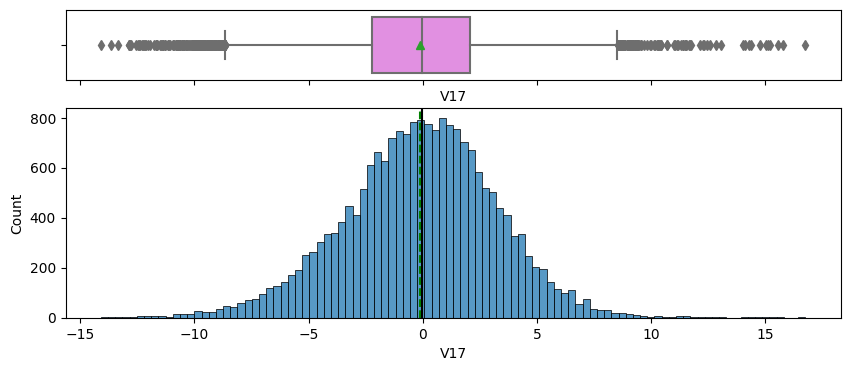

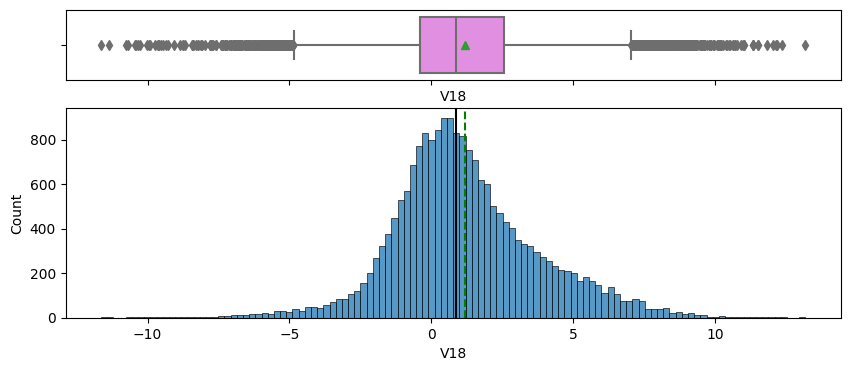

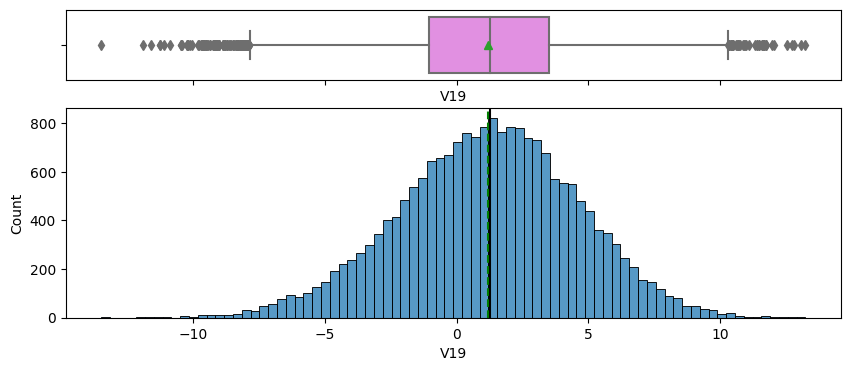

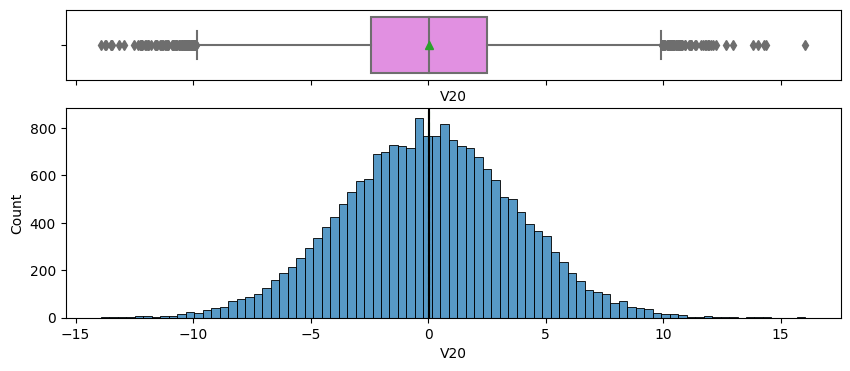

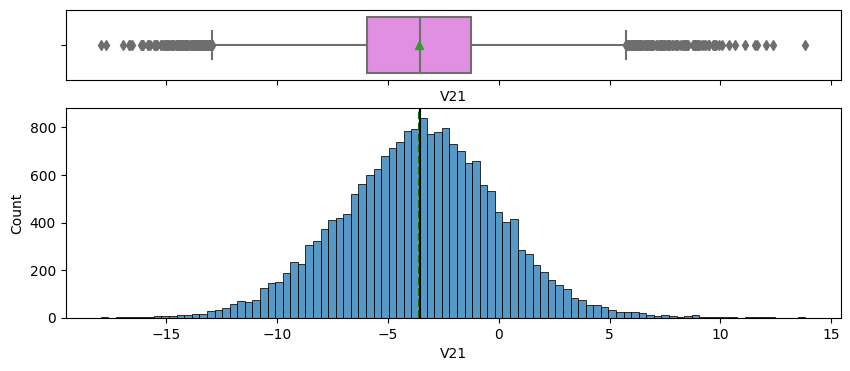

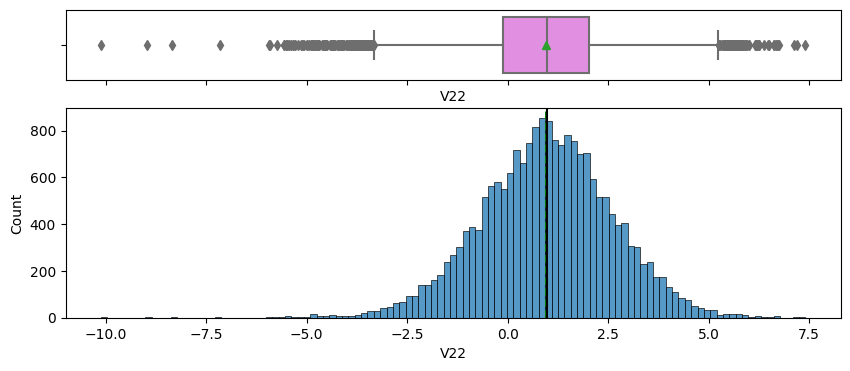

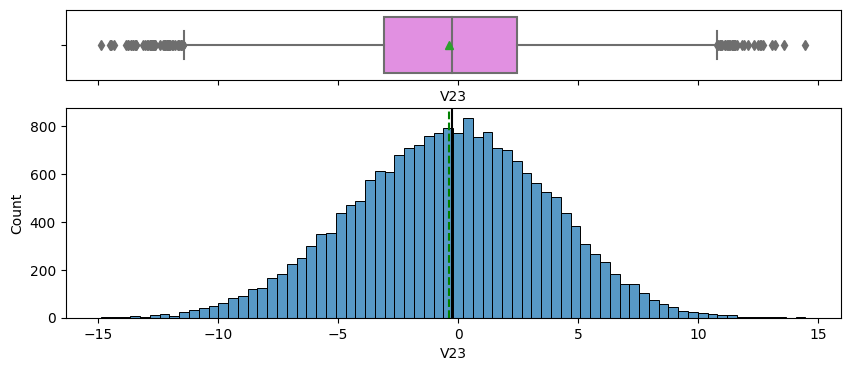

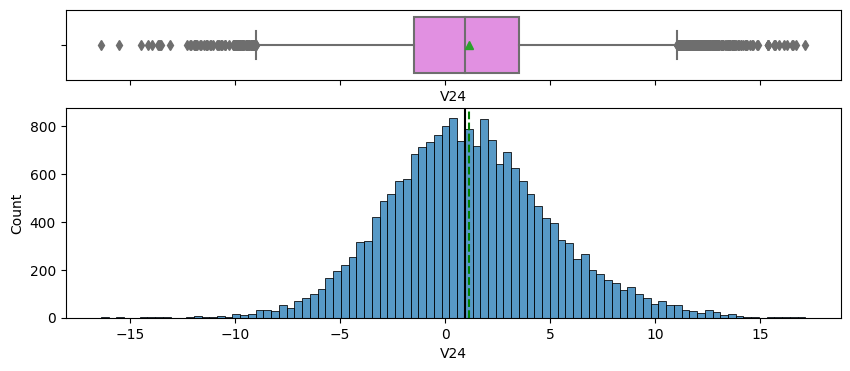

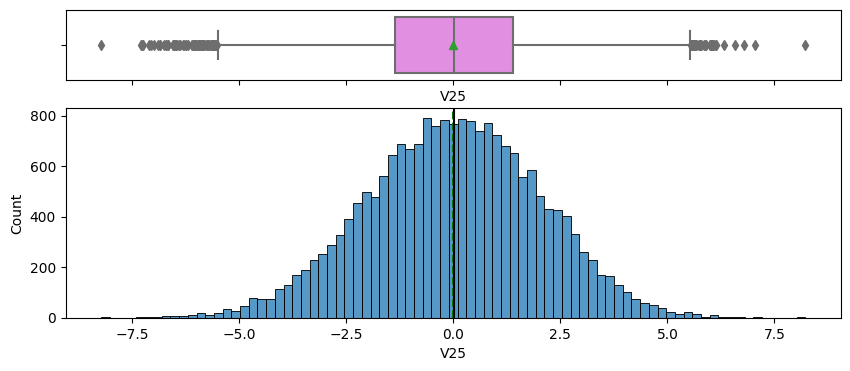

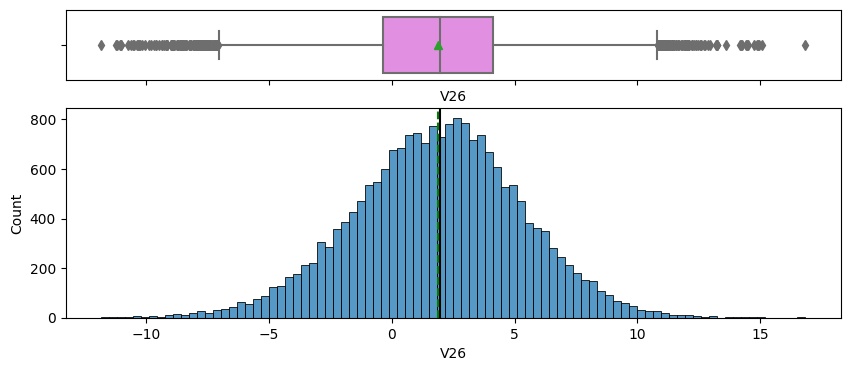

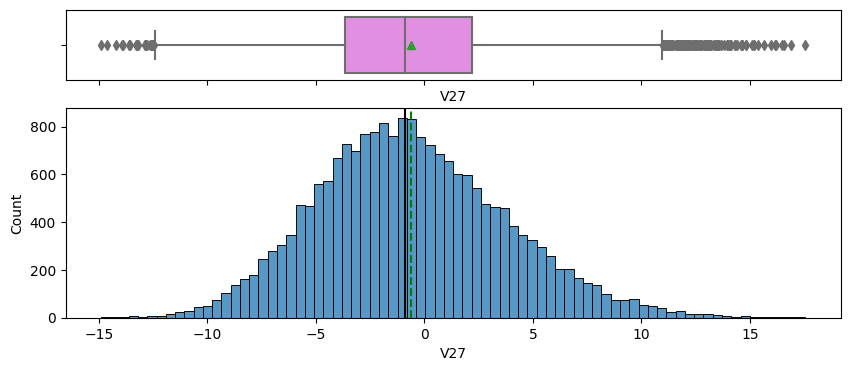

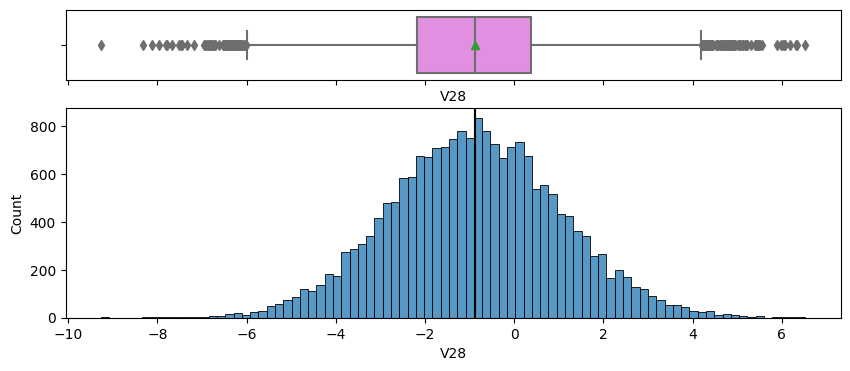

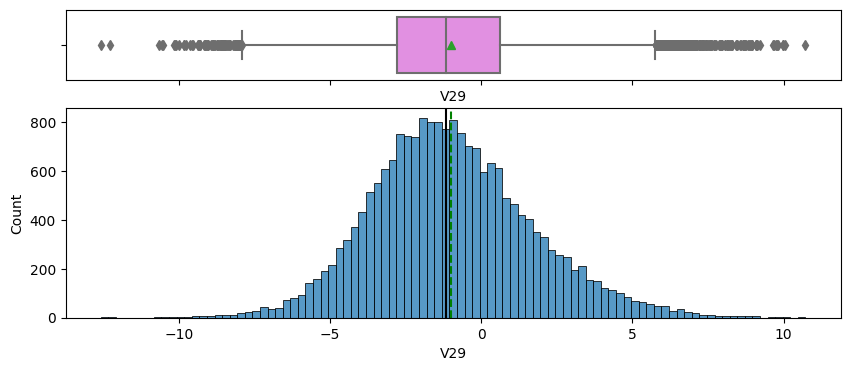

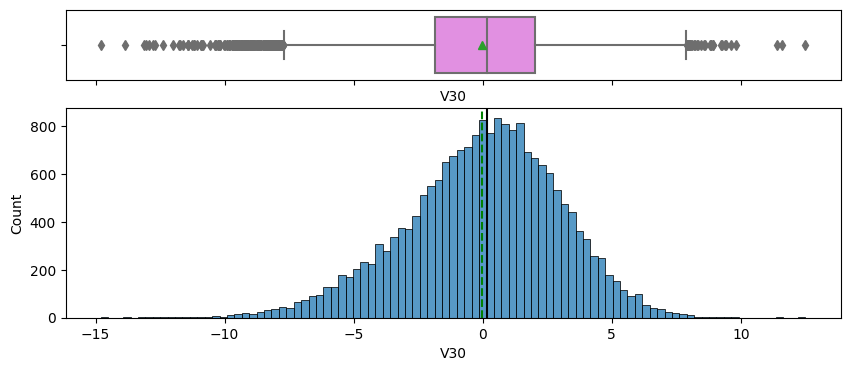

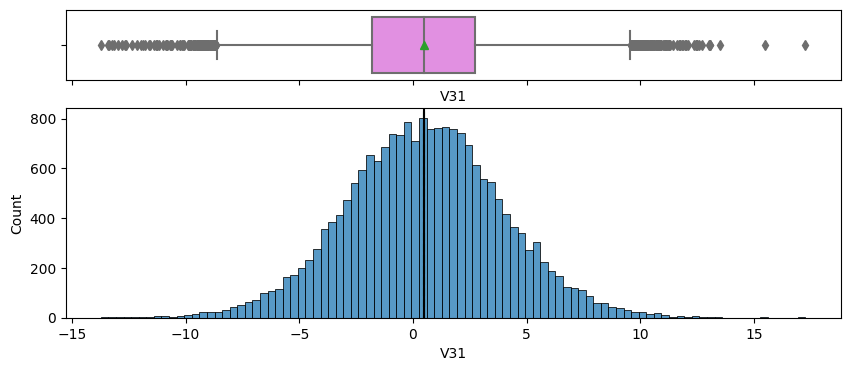

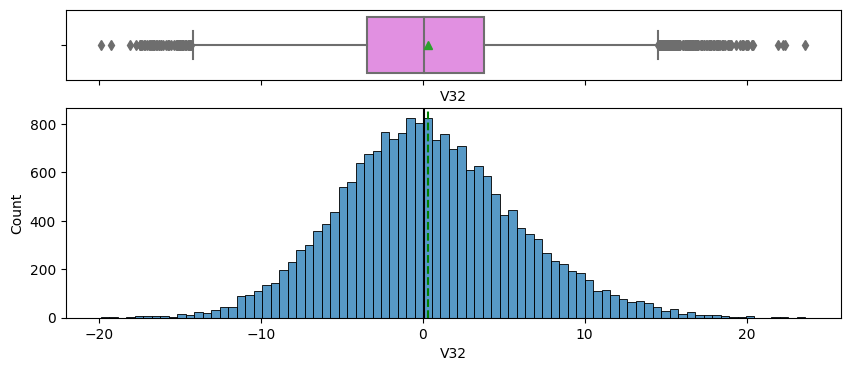

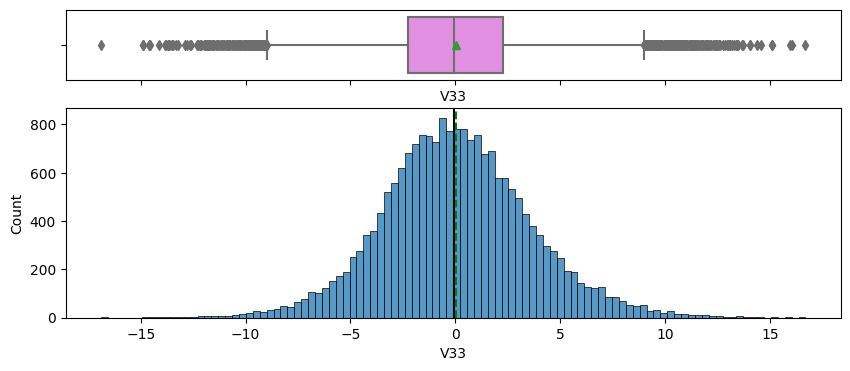

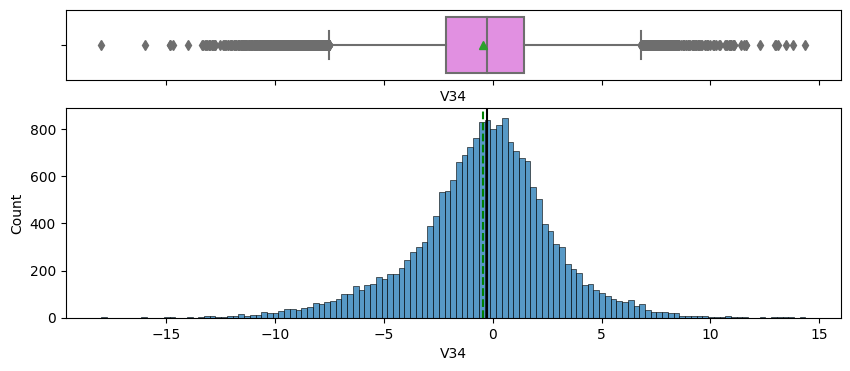

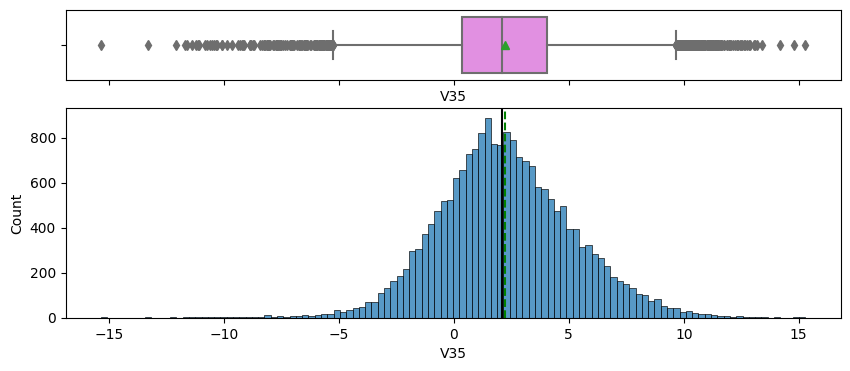

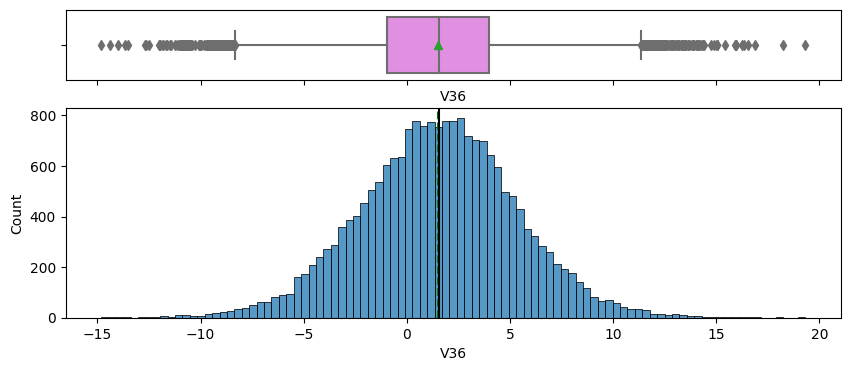

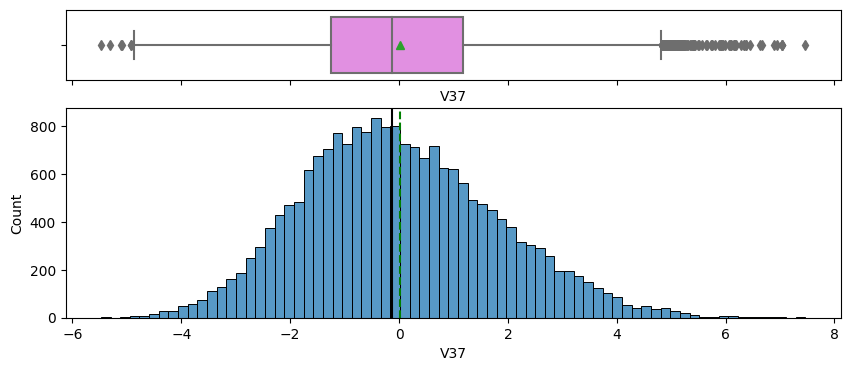

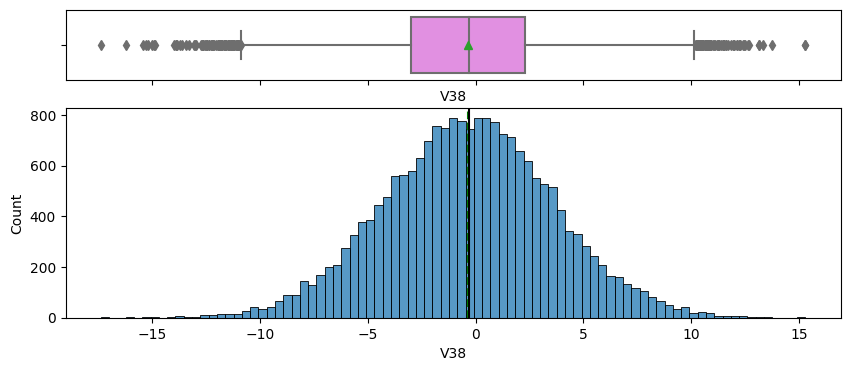

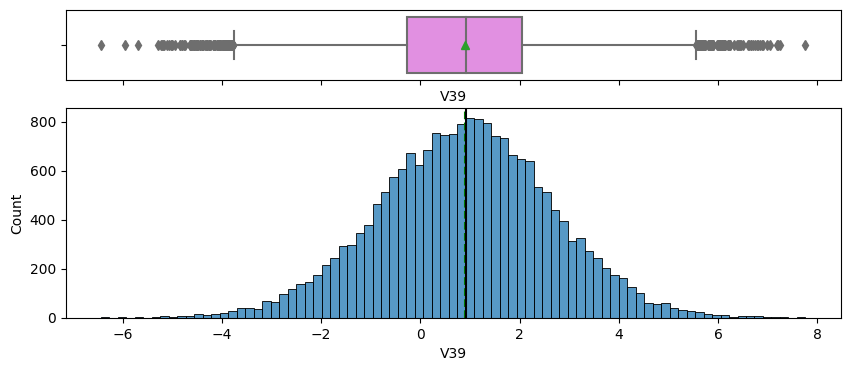

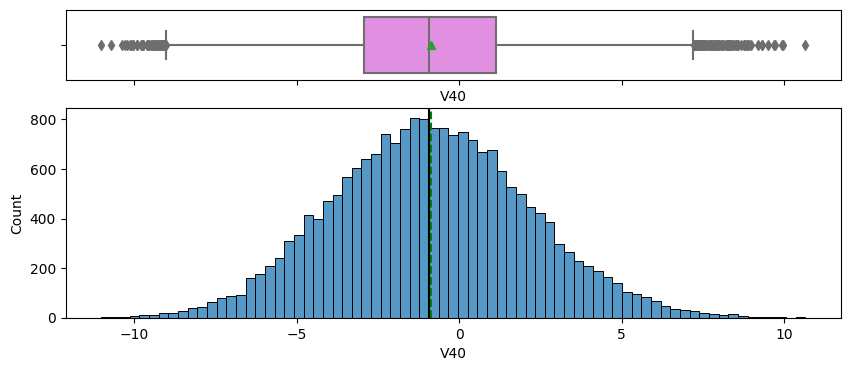

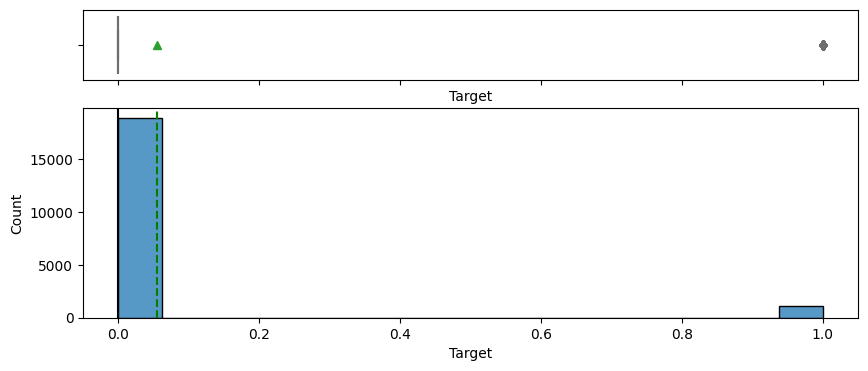

In [ ]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(10, 4), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

* All features V1 - V40 have close to normal distribution with outliers available on both tails.
* The Target event/non-event is imbalanced.

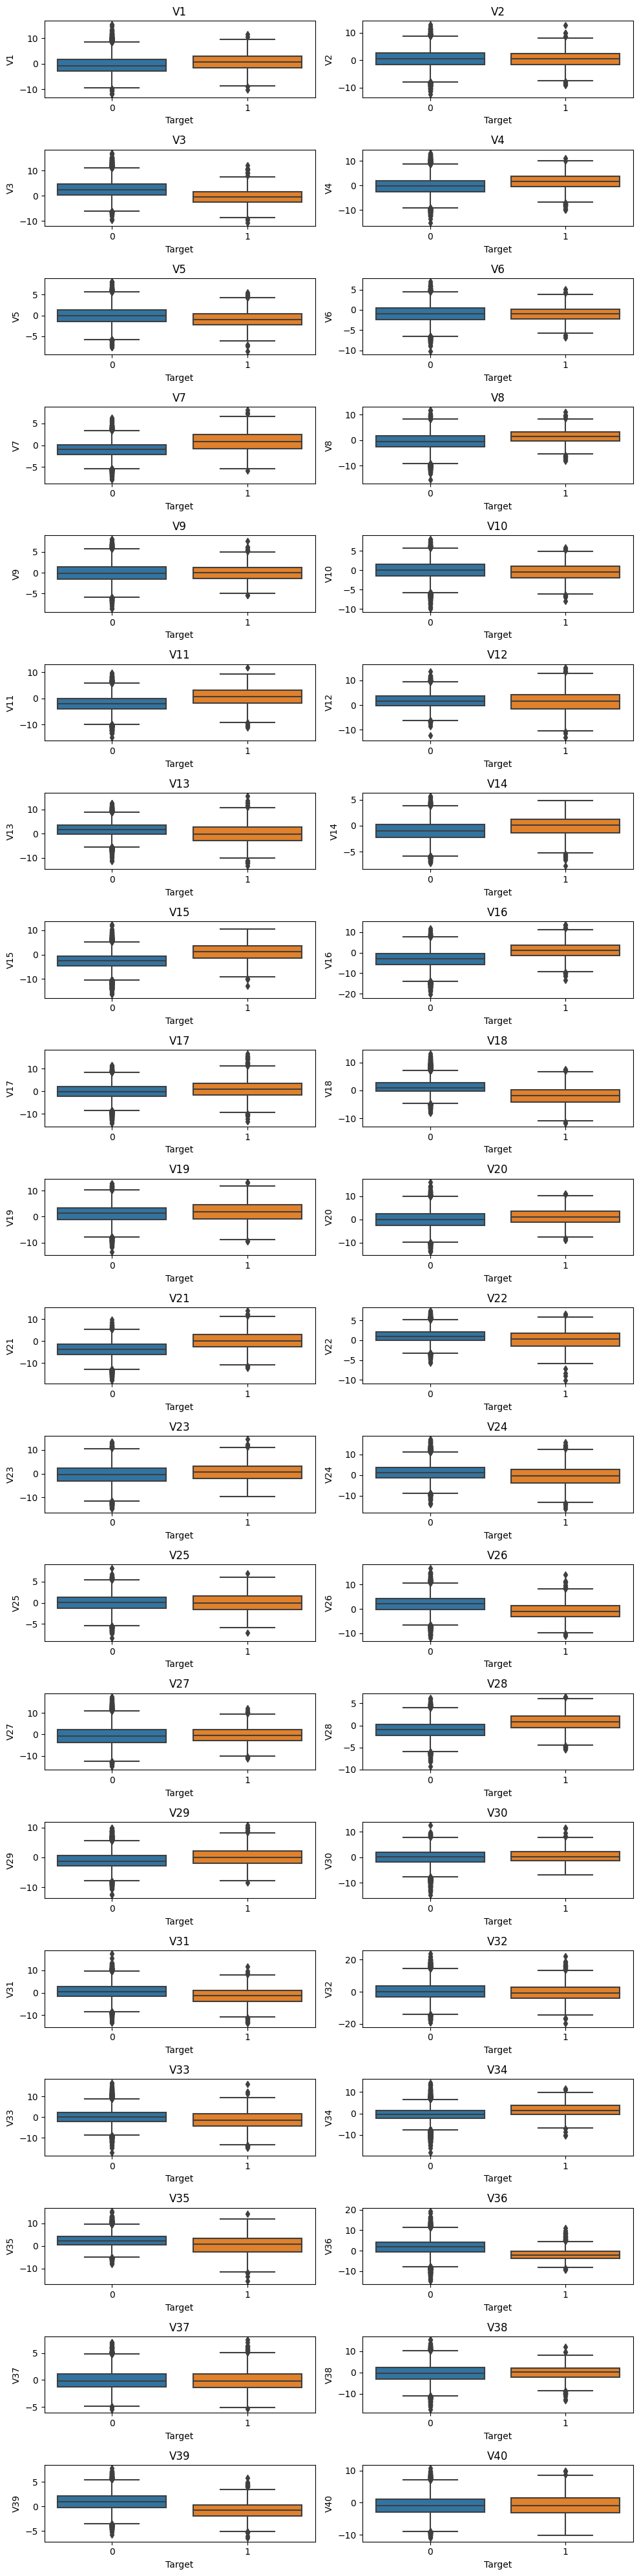

In [ ]:
# bi-variate analysis
cols = df.columns[:-1]
plt.figure(figsize=(10, 40))

for i, variable in enumerate(cols):
    plt.subplot(20, 2, i + 1)
    sns.boxplot(data = df, x="Target", y = variable)
    plt.tight_layout()
    plt.title(variable)
plt.show()


* Some features have more discrimination power, others seems does not imply any differenciation between 0 and 1 target classes.

## Data Pre-processing

In [ ]:
# Splitting data into training, validation and test set (test data is already prepared in a separate file):

df_test = pd.read_csv('./drive/MyDrive/Data Science PGD University of Texas/6. Model Tuning/Project. ReneWind/Test.csv.csv')
df_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


In [ ]:

# first we split data into 2 parts, say temporary and test

X_train, X_val, y_train, y_val = train_test_split(
    df[df.columns[:-1]], df['Target'], test_size=0.25, random_state=1, stratify=df['Target']
)

X_test = df_test[df_test.columns[:-1]]
y_test = df_test['Target']

print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


## Missing value imputation




In [ ]:
# Note: We will be imputing the missing values in the data after splitting into train, validation, and test sets to avoid data leakage.
imputer = SimpleImputer(strategy="median")


In [ ]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_train.columns)

# Transform the test data
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_train.columns)

<Axes: ylabel='V1'>

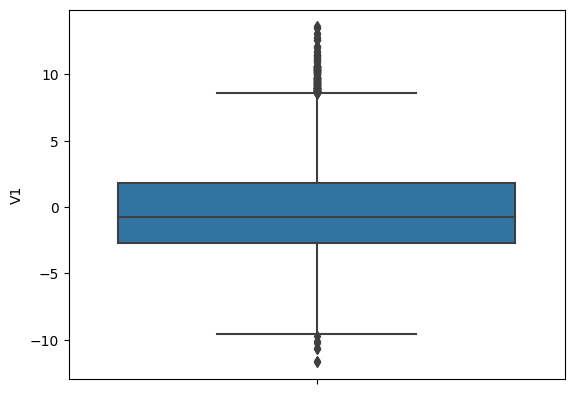

In [ ]:
sns.boxplot(data = X_train, y = "V1")

In [ ]:
# outliers limitation
# Apply only to Train Data Set

def limit_outliers(df, list_col):
  for column in list_col:
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.75)

    IQR = q2 - q1

    #defining max and min limits
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR)

    #capping
    df[column] = pd.DataFrame(np.where(df[column] > max_limit, max_limit,
            (np.where(df[column] < min_limit, min_limit, df[column]))), columns=[column])
  return df

#apply limit outliers function to Train data
X_train = limit_outliers(X_train, df.columns[:-1])

<Axes: ylabel='V1'>

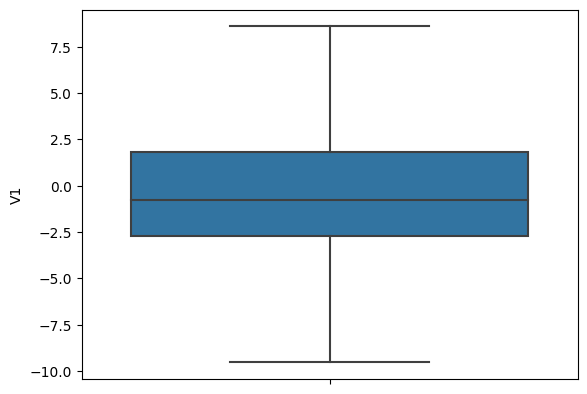

In [ ]:
sns.boxplot(data = X_train, y = "V1")

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("LogReg", LogisticRegression(random_state=1)))
models.append(("RandF", RandomForestClassifier(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("XGB", XGBClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7282735733352572
LogReg: 0.5443835221124017
RandF: 0.7198903398023231
Bagging: 0.7162830964576872
Boosting: 0.7186855205252146
XGB: 0.792020777721665

Validation Performance:

dtree: 0.6906474820143885
LogReg: 0.46402877697841727
RandF: 0.737410071942446
Bagging: 0.7266187050359713
Boosting: 0.7338129496402878
XGB: 0.8165467625899281


### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:

results_oversampled = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results_oversampled.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.9715556473371478
LogReg: 0.8870694738216119
RandF: 0.9834134249510693
Bagging: 0.9749436336193981
Boosting: 0.9267360857680712
XGB: 0.9885657268990009

Validation Performance:

dtree: 0.802158273381295
LogReg: 0.8273381294964028
RandF: 0.8525179856115108
Bagging: 0.841726618705036
Boosting: 0.8776978417266187
XGB: 0.8597122302158273


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:

results_undersampled = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results_undersampled.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8581776206622898
LogReg: 0.8798210807301061
RandF: 0.9014717552846114
Bagging: 0.8690065651828872
Boosting: 0.9014573263112331
XGB: 0.9110886660414111

Validation Performance:

dtree: 0.8453237410071942
LogReg: 0.8453237410071942
RandF: 0.8920863309352518
Bagging: 0.8705035971223022
Boosting: 0.8920863309352518
XGB: 0.89568345323741


* Based on All 3 experiments the TOP Performer Models are:
* XGBoost
* GradientBoostingClassifier
* RandomForestClassifier

## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Random Forest, Gradient Boosting and XGBoost with original data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
               "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
               "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("1. Random Forest. Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


1. Random Forest. Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.6960248178342111:


In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
               "subsample":[0.5,0.7],
               "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("2. Gradient Boosting. Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


2. Gradient Boosting. Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7512517134405887:


In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
             'learning_rate': [0.1,0.2],
             'gamma': [0,3,5],
             'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("3. XGBClassifier. Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


3. XGBClassifier. Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.8486039968256257:


### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
               "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
               "max_samples": np.arange(0.4, 0.7, 0.1) }


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("1. Random Forest. Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

1. Random Forest. Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9816489598219992:


In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
               "subsample":[0.5,0.7],
               "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("2. Gradient Boosting. Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


2. Gradient Boosting. Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9714851255280728:


In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
             'learning_rate': [0.1,0.2],
             'gamma': [0,3,5],
             'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("3. XGBClassifier. Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


3. XGBClassifier. Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.2, 'gamma': 0} with CV score=0.9957651790658588:


### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
               "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
               "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("1. Random Forest. Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

1. Random Forest. Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8966091912560422:


In [ ]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
               "subsample":[0.5,0.7],
               "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("2. Gradient Boosting. Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

2. Gradient Boosting. Best parameters are {'subsample': 0.5, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.05} with CV score=0.8954332299256909:


In [ ]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
             'learning_rate': [0.1,0.2],
             'gamma': [0,3,5],
             'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("3. XGBClassifier. Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

3. XGBClassifier. Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9242478897626434:


## Model performance comparison and choosing the final model

In [ ]:
# Tuned Random Forest Model

tuned_rf = RandomForestClassifier(
    random_state=1,
    n_estimators = 300,
    min_samples_leaf = 1,
    max_samples = 0.6,
    max_features = 'sqrt'
)

tuned_rf.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

In [ ]:
# Tuned Gradient Boosting Model

tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample = 0.5,
    n_estimators = 125,
    max_features = 0.7,
    learning_rate = 0.05
    )

tuned_gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.5)

In [ ]:
# Tuned XGB Boosting Model

tuned_xgb = XGBClassifier(
    random_state=1,
    subsample = 0.9,
    scale_pos_weight = 10,
    n_estimators = 200,
    learning_rate = 0.1,
    gamma = 5
    )

tuned_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

### Test set final performance

In [ ]:
rf_grid_val = model_performance_classification_sklearn(
    tuned_rf, X_val, y_val
)
rf_grid_val

,Accuracy,Recall,Precision,F1
0,0.983,0.705,0.985,0.822


In [ ]:
gbm_grid_val = model_performance_classification_sklearn(
    tuned_gbm, X_val, y_val
)
gbm_grid_val

,Accuracy,Recall,Precision,F1
0,0.980,0.687,0.941,0.794


In [ ]:
xgb_grid_val = model_performance_classification_sklearn(
    tuned_xgb, X_val, y_val
)
xgb_grid_val

,Accuracy,Recall,Precision,F1
0,0.989,0.853,0.940,0.894


* XGB Model shows the best overall accuracy and Recall, but the lowest Precision. Also regardless low Precision XGB Model has the highest F1 score. These all results are calculated on validation sample.

In [ ]:
# test set scoring
rf_grid_test = model_performance_classification_sklearn(
    tuned_rf, X_test, y_test
)
rf_grid_test

,Accuracy,Recall,Precision,F1
0,0.982,0.688,0.985,0.810


In [ ]:
gbm_grid_test = model_performance_classification_sklearn(
    tuned_gbm, X_test, y_test
)
gbm_grid_test

,Accuracy,Recall,Precision,F1
0,0.978,0.652,0.929,0.767


In [ ]:
xgb_grid_test = model_performance_classification_sklearn(
    tuned_xgb, X_test, y_test
)
xgb_grid_test

,Accuracy,Recall,Precision,F1
0,0.988,0.823,0.955,0.884


* On Test data XGB Model shows similar dynamic as it was on validation one - the best overall accuracy and Recall, but Precision is lower than Fandom Forest's Precision. Also regardless low Precision XGB Model has the highest F1 score.

## Pipelines to build the final model


In [ ]:
from imblearn import FunctionSampler

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),
                                      ])

x_train_final = df[df.columns[:-1]]
y_train_final = df['Target']

print(x_train_final.shape, X_test.shape)


(20000, 40) (5000, 40)


In [ ]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", numeric_transformer),
        (
            "XGB",
            XGBClassifier(
            random_state=1,
            subsample = 0.9,
            scale_pos_weight = 10,
            n_estimators = 200,
            learning_rate = 0.1,
            gamma = 5
            )
        ),
    ]
)
# Fit the model on training data
model.fit(x_train_final, y_train_final)


Pipeline(steps=[('pre',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='median'))])),
                ('XGB',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=5, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=1, ...))])

In [ ]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(model, X_test, y_test)
Model_test

,Accuracy,Recall,Precision,F1
0,0.988,0.840,0.937,0.886


# Business Insights and Conclusions

**Data Overview:**

* There are a total of 40 features and 1 Target.
* Two columns - V1 and V2 have missing values.
* Target does not have ay missings.

**Features and Target**
* All features have values in the range between -20 and 24
* And Binary Target variable 0 or 1 with overall event rate 5.6%

**Missing and Duplicates**
* V1 and V2 have 9% missing data. Other features have no missings.
* we have no duplicated rows


**Modeling experiments with Balanced Data**
Based on All 3 experiments the TOP Performer Models are:

XGBoost,
GradientBoostingClassifier,
RandomForestClassifier

**Best Model Selection**

On Test data XGB Model shows similar dynamic as it was on validation one - the best overall accuracy and Recall, but Precision is lower than Fandom Forest's Precision. Also regardless low Precision XGB Model has the highest F1 score.


True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
False positives (FP) are detections where there is no failure. These will result in inspection costs.
It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.


Recall = TP/(TP+FN) = 84%, - maximizing recall is the most important part for the project as failing to detect a failure will lead to breaking and replacing a generator wich is most expensive. The recall of 84% is the highest value amoung tested models.

Precision = TP/(TP+FP) = 93.7%, precision shows that in almost 94 times of 100 the generator that was classified and failure actually needs repair. In other 6 cases we have type 1 error wich leads to inspection cost which is not expensive.

So by using the model we can timely detect and repair 84% of all generators that need repair. That was the best result we could reach. Other 16% of generators that have issues we failed to detect so they will break and will need replacement.
Together with high precision we do not waste resources on unnecessary inspections. But for the future process improving we might consider changing the classification threshold in order to increase Recall and decrease Precision as cost of replacing generator will be higher than multiple inspections.